# Internet adoption around the world
This project is based on a study about the Internet adoption around the world and how the price, speed and country's development affects this data.

## Importing the libraries
The first thing to do is importing the modules and making sure that they are installed correctly into our envirorment.

In [48]:
#Uncomment the lines below if the following modules are not installed on your envirorment
#!pip install matplotlib
#!pip install pandas
#!pip install plotly
#!pip install seaborn
#!pip install kaleido

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Project structure


The `datasets/` folder contains the following files.

In [2]:
os.listdir("datasets")

['GDP2021.csv',
 'HDR2020.csv',
 'worldwide internet prices in 2022 - IN 2022.csv',
 'worldwide internet speed in 2022 - avg speed.csv',
 'worldwide internet users - users.csv']

Datasets used for this projects:
- `worldwide internet prices in 2022 - IN 2022.csv`: Contains informations about the price, plans available, and the price of most expensive and cheapest 1 GB for every country
- `worldwide internet speed in 2022 - avg speed.csv`: Contains the average speed in Mbit per second for every country
- `worldwide internet users - users.csv`: Contains the number of internet users and the total population for every country
- `GDP2021.csv`: Contains the GDP (Gross Domestic Product) per capita for every country. This index measures a country's economic output per person and is calculated by dividing the GDP of a country by its population.
- `HDR2020.csv`: Contains the HDI (Human Development Index) for every country. This index is a summary measure of average achievement in key dimensions of human development.

Sources:
- Worldwide internet data in 2022: https://www.kaggle.com/datasets/ramjasmaurya/1-gb-internet-price
- HDI (Human Development Index) 2019: https://hdr.undp.org/data-center/documentation-and-downloads
- GDP per capita (in USD): https://data.worldbank.org/indicator/NY.GDP.PCAP.CD


## Data cleaning
The datasets just presented contain a lot of data, however, we will not need all of them and some of them are not consistent, so we have to face a data cleaning process, removing the columns that we do not need and managing null or non-consistent values.

In [3]:
data_folder = "datasets"

### `GDP2021.csv` cleaning

First we import the dataset and initialize the DataFrame.

In [4]:
df_gdp = pd.read_csv(os.path.join(data_folder, "GDP2021.csv"))
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726325,162.555968,172.271022,199.784916,180.228774,199.517228,...,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441089,131.852423,138.524029,...,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,4986.582469,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1607.152173,1674.002572,1601.807163,1152.738019,964.340344,758.145949,750.554583,631.681490,690.759273,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,511.618737,526.461750,546.261935,589.160461,632.716104,674.186433,...,7467.079185,6988.808739,6259.839681,5756.965741,6690.939847,7005.095413,6624.761865,5655.867654,6994.211654,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,1120.630171,NaN


As we can see, the dataset contains the data for each country from 1960 to today, for what we have to do we are enough data on the GDP per capita of the year 2020 (we do not choose those of 2021 due to the fact that different countries have null values )

In [5]:
df_gdp2020 = df_gdp[["Country Name", "Country Code", "2020"]]
df_gdp2020

,Country Name,Country Code,2020
0,Aruba,ABW,23384.298791
1,Africa Eastern and Southern,AFE,1360.878645
2,Afghanistan,AFG,516.747871
3,Africa Western and Central,AFW,1709.764129
4,Angola,AGO,1631.431691
...,...,...,...
261,Kosovo,XKX,4310.811183
262,"Yemen, Rep.",YEM,631.681490
263,South Africa,ZAF,5655.867654
264,Zambia,ZMB,985.132436


Let's rename the columns now.

In [6]:
df_gdp2020 = df_gdp2020.rename(columns={
    "2020": "GDP"
}, copy=True, inplace=False)
df_gdp2020

,Country Name,Country Code,GDP
0,Aruba,ABW,23384.298791
1,Africa Eastern and Southern,AFE,1360.878645
2,Afghanistan,AFG,516.747871
3,Africa Western and Central,AFW,1709.764129
4,Angola,AGO,1631.431691
...,...,...,...
261,Kosovo,XKX,4310.811183
262,"Yemen, Rep.",YEM,631.681490
263,South Africa,ZAF,5655.867654
264,Zambia,ZMB,985.132436


Cleaning the data.

In [7]:
df_gdp2020 = df_gdp2020.loc[df_gdp2020["GDP"].notna()]
df_gdp2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  251 non-null    object 
 1   Country Code  251 non-null    object 
 2   GDP           251 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.8+ KB


### `HDR2020.csv` cleaning

Importing the dataset into a pandas DataFrame.

In [8]:
df_hdi = pd.read_csv(os.path.join(data_folder, "HDR2020.csv"))
df_hdi

,iso3,country,hdicode,region,hdi_rank_2019,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,gnipc_2010,gnipc_2011,gnipc_2012,gnipc_2013,gnipc_2014,gnipc_2015,gnipc_2016,gnipc_2017,gnipc_2018,gnipc_2019
0,AFG,Afghanistan,Low,SA,169.0,0.302,0.307,0.316,0.312,0.307,...,1917.394944,2013.614084,2164.641446,2229.906554,2214.414390,2128.161886,2134.866156,2229.657978,2217.175808,2229.362021
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,6913.160589,6887.003763,7282.049679,7478.856252,7704.367840,7652.152491,7189.031576,6861.580571,6360.551085,6104.054640
2,ALB,Albania,High,ECA,69.0,0.650,0.631,0.615,0.618,0.624,...,10774.721800,11237.447160,11365.140100,11806.357820,11951.262990,12273.472790,12753.307240,13071.095440,13636.864160,13998.299890
3,AND,Andorra,Very High,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,49261.522250,47366.246500,47347.415550,48486.415270,50567.869660,51779.832310,53245.151100,54371.344670,55253.539290,56000.303360
4,ARE,United Arab Emirates,Very High,AS,31.0,0.723,0.735,0.738,0.745,0.755,...,54911.286620,56152.974740,57447.350900,60007.280900,62499.797840,65528.562580,66881.303340,67667.529860,67195.144070,67462.095300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,Europe and Central Asia,NaN,NaN,NaN,0.662,0.660,0.655,0.652,0.647,...,13569.467840,14428.049910,14874.924620,15673.049410,16106.237260,16405.601040,16586.066320,17304.570200,17681.471150,17939.260030
202,NaN,Latin America and the Caribbean,NaN,NaN,NaN,0.632,0.637,0.643,0.648,0.654,...,14347.224160,14840.565630,15107.901270,15406.644950,15461.446390,15376.018970,15081.796980,15099.754830,15009.505790,14811.914690
203,NaN,South Asia,NaN,NaN,NaN,0.437,0.443,0.450,0.456,0.462,...,4485.441685,4646.120434,4755.925801,4939.747501,5200.584183,5466.463904,5806.167594,6141.201410,6368.240926,6531.552457
204,NaN,Sub-Saharan Africa,NaN,NaN,NaN,0.404,0.406,0.406,0.408,0.409,...,3322.968341,3393.581592,3468.250329,3572.503098,3675.644359,3719.488811,3676.551383,3673.065762,3669.296934,3685.644365


The dataset also contains information about regions and other subsets of states, which we do not need, so we exclude them and take only the HDI of the countries in 2019 (the most recent year)

In [9]:
df_hdi2019 = df_hdi.loc[df_hdi["iso3"].notna()][["country", "hdi_2019"]]
df_hdi2019


,country,hdi_2019
0,Afghanistan,0.511
1,Angola,0.581
2,Albania,0.795
3,Andorra,0.868
4,United Arab Emirates,0.890
...,...,...
190,Samoa,0.715
191,Yemen,0.470
192,South Africa,0.709
193,Zambia,0.584


Now we rename the columns.

In [10]:
df_hdi2019 = df_hdi2019.rename(columns={
    "country": "Country Name",
    "hdi_2019": "HDI"
}, copy=True, inplace=False)
df_hdi2019

,Country Name,HDI
0,Afghanistan,0.511
1,Angola,0.581
2,Albania,0.795
3,Andorra,0.868
4,United Arab Emirates,0.890
...,...,...
190,Samoa,0.715
191,Yemen,0.470
192,South Africa,0.709
193,Zambia,0.584


Cleaning the data.

In [11]:
df_hdi2019 = df_hdi2019.loc[df_hdi2019["HDI"].notna()]
df_hdi2019.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  189 non-null    object 
 1   HDI           189 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


### `worldwide internet prices in 2022 - IN 2022.csv` cleaning

Importing the dataset into a pandas DataFrame.

In [12]:
df_prices = pd.read_csv(os.path.join(data_folder, "worldwide internet prices in 2022 - IN 2022.csv"))
df_prices

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020)
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68
...,...,...,...,...,...,...,...,...,...
237,VA,Vatican City (Holy See),Europe,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
238,VE,Venezuela,SOUTH AMERICA,NaN,HYPERINFLATION,NaN,NaN,NaN,NaN
239,WF,Wallis and Futuna,OCEANIA,NaN,NO PROVIDERS,NaN,NaN,NaN,NaN
240,CD,Congo (Democratic Republic of),SUB-SAHARAN AFRICA,NaN,Prices listed in non-convertible 'units',NaN,NaN,NaN,NaN


Selecting the columns that we need for our study.

In [13]:
df_prices = df_prices[["Name", "Average price of 1GB (USD)", "NO. OF Internet Plans "]]
df_prices

,Name,Average price of 1GB (USD),NO. OF Internet Plans
0,Israel,$0.05,27.0
1,Kyrgyzstan,$0.15,20.0
2,Fiji,$0.19,18.0
3,Italy,$0.27,29.0
4,Sudan,$0.27,33.0
...,...,...,...
237,Vatican City (Holy See),NO PROVIDERS,NaN
238,Venezuela,HYPERINFLATION,NaN
239,Wallis and Futuna,NO PROVIDERS,NaN
240,Congo (Democratic Republic of),Prices listed in non-convertible 'units',NaN


Renaming the colunms.

In [14]:
df_prices = df_prices.rename(columns={
    "Name": "Country Name",
    "Average price of 1GB (USD)": "Average price of 1GB",
    "NO. OF Internet Plans ": "Number of plans"
}, copy=True, inplace=False)
df_prices

,Country Name,Average price of 1GB,Number of plans
0,Israel,$0.05,27.0
1,Kyrgyzstan,$0.15,20.0
2,Fiji,$0.19,18.0
3,Italy,$0.27,29.0
4,Sudan,$0.27,33.0
...,...,...,...
237,Vatican City (Holy See),NO PROVIDERS,NaN
238,Venezuela,HYPERINFLATION,NaN
239,Wallis and Futuna,NO PROVIDERS,NaN
240,Congo (Democratic Republic of),Prices listed in non-convertible 'units',NaN


We need to get rid of the dollar sign '`$`' in order to convert the price value to numeric. For doing that we use regular expressions.

In [17]:
df_prices = df_prices.copy()
df_prices = df_prices.loc[df_prices["Number of plans"].notna()]
df_prices.loc["Average price of 1GB"] = df_prices["Average price of 1GB"].replace('[\$,]', '', regex=True).astype(float)
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 0 to Average price of 1GB
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Name          230 non-null    object 
 1   Average price of 1GB  230 non-null    object 
 2   Number of plans       230 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


### `worldwide internet speed in 2022 - avg speed.csv` cleaning

Importing the dataset into a pandas DataFrame.

In [18]:
df_speeds = pd.read_csv(os.path.join(data_folder, "worldwide internet speed in 2022 - avg speed.csv"))
df_speeds

,Country,Avg \n(Mbit/s)Ookla
0,Canada,75.18
1,South Korea,117.95
2,Netherlands,108.33
3,Japan,44.05
4,Norway,134.73
...,...,...
139,Sudan,9.50
140,Cuba,9.10
141,Tajikistan,7.05
142,Venezuela,5.68


Renaming the columns.

In [19]:
df_speeds = df_speeds.rename(columns={
    "Country": "Country Name",
    "Avg \n(Mbit/s)Ookla": "Average speed"
}, copy=True, inplace=False)
df_speeds

,Country Name,Average speed
0,Canada,75.18
1,South Korea,117.95
2,Netherlands,108.33
3,Japan,44.05
4,Norway,134.73
...,...,...
139,Sudan,9.50
140,Cuba,9.10
141,Tajikistan,7.05
142,Venezuela,5.68


Cleaning the data.

In [20]:
df_speeds = df_speeds.loc[df_speeds["Average speed"].notna()]
df_speeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   143 non-null    object 
 1   Average speed  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


### `worldwide internet users - users.csv` cleaning

Importing the dataset into pandas DataFrame.

In [21]:
df_users = pd.read_csv(os.path.join(data_folder, "worldwide internet users - users.csv"), thousands=",")
df_users

,Country or area,Subregion,Region,Internet users,Population
0,China,Eastern Asia,Asia,1010740000,1.427648e+09
1,India,Southern Asia,Asia,833710000,1.352642e+09
2,United States,Northern America,Americas,312320000,3.270963e+08
3,Indonesia,South-eastern Asia,Asia,196000000,2.676705e+08
4,Brazil,South America,Americas,160010801,2.094693e+08
...,...,...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",Western Africa,Africa,2906,6.035000e+03
210,Falkland Islands,South America,Americas,2881,3.234000e+03
211,Montserrat,Caribbean,Americas,2833,4.993000e+03
212,Wallis and Futuna,Polynesia,Oceania,1383,1.166100e+04


Selecting the columns that we need for our study.

In [22]:
df_users = df_users[["Country or area", "Internet users", "Population"]]
df_users

,Country or area,Internet users,Population
0,China,1010740000,1.427648e+09
1,India,833710000,1.352642e+09
2,United States,312320000,3.270963e+08
3,Indonesia,196000000,2.676705e+08
4,Brazil,160010801,2.094693e+08
...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",2906,6.035000e+03
210,Falkland Islands,2881,3.234000e+03
211,Montserrat,2833,4.993000e+03
212,Wallis and Futuna,1383,1.166100e+04


Renaming the columns.

In [23]:
df_users = df_users.rename(columns={
    "Country or area": "Country Name"
})
df_users

,Country Name,Internet users,Population
0,China,1010740000,1.427648e+09
1,India,833710000,1.352642e+09
2,United States,312320000,3.270963e+08
3,Indonesia,196000000,2.676705e+08
4,Brazil,160010801,2.094693e+08
...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",2906,6.035000e+03
210,Falkland Islands,2881,3.234000e+03
211,Montserrat,2833,4.993000e+03
212,Wallis and Futuna,1383,1.166100e+04


Cleaning the data.

In [24]:
df_users = df_users.loc[df_users["Population"].notna()]
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 213
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    212 non-null    object 
 1   Internet users  212 non-null    int64  
 2   Population      212 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


# Dataset analysis
Now that we have cleaned up and made consistent all the necessary datasets, we can begin to carry out the analyzes on them.

## Question 1: Is there a greater adoption of Internet in more developed countries?

In order to assess whether there is a relationship between the development of a nation and the Internet adoption of its population, we will use two indices:
- **Human Development Index**, which is a statistic composite index of life expectancy, education, and per capita income indicators, which are used to rank countries's human and social development.
- **GDP per capita**, which measures a country's economic output per person.

The reason why it is not possible to use only one index is because there is no such generic index, and therefore the ideal compromise is to use two indices: one that tracks economic development (GDP per capita), the other that tracks social development (HDI) of each country.

<AxesSubplot:xlabel='Country Name'>

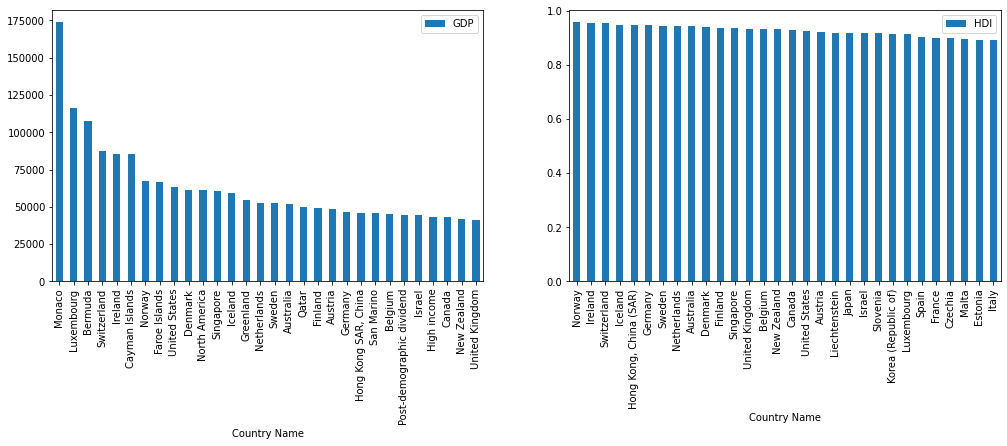

In [86]:
fig, axes = plt.subplots(figsize=(17, 5), nrows=1, ncols=2)

df_gdp2020 = df_gdp2020.sort_values('GDP', ascending=False)
df_gdp2020.head(30).plot.bar(ax=axes[0], x='Country Name', y='GDP')

df_hdi2019 =  df_hdi2019.sort_values('HDI', ascending=False)
df_hdi2019.head(30).plot.bar(ax=axes[1], x='Country Name', y='HDI')

We can also use violinplots to visualize the distribution of the data.

<AxesSubplot:xlabel='HDI'>

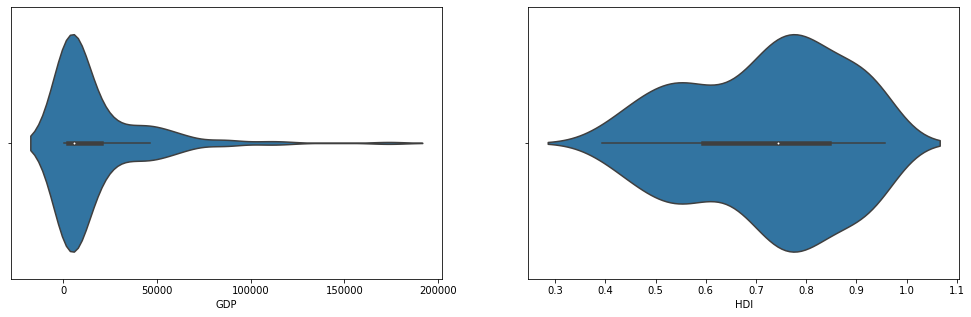

In [90]:
fig, axes = plt.subplots(figsize=(17, 5), nrows=1, ncols=2)

sns.violinplot(
    data=df_users_merged_gdp, 
    x="GDP",
    ax=axes[0]
)

sns.violinplot(
    data=df_users_merged_hdi, 
    x="HDI",
    ax=axes[1]
)


Only by viewing the data with a bar chart can we see that the HDI index is much more homogeneous in the distribution of values, however with this type of diagrams it is not possible to have a clear overall view of the data, so it is better to visualize the data on a world map.

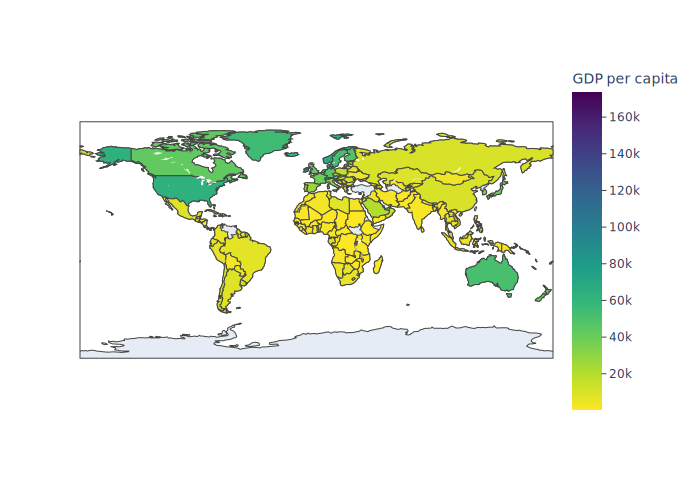

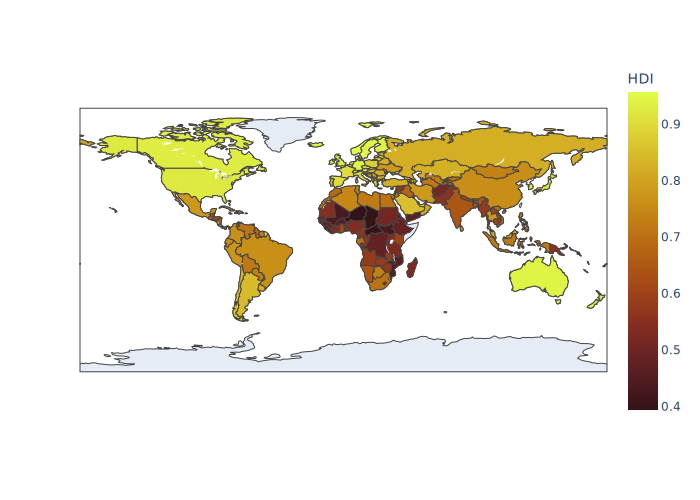

In [26]:
fig_gdp = px.choropleth(
    df_gdp2020, 
    locations='Country Name', 
    locationmode='country names', 
    scope='world', 
    color='GDP',
    color_continuous_scale='Viridis_r'
)

fig_gdp.update_layout(coloraxis_colorbar=dict(
    title = 'GDP per capita',
    ticks = 'outside',
))

fig_hdi = px.choropleth(
    df_hdi2019, 
    locations='Country Name', 
    locationmode='country names', 
    scope='world', 
    color='HDI',
    color_continuous_scale='solar'
)

fig_gdp.show("svg") #remove "svg" parameter to have interactive maps
fig_hdi.show("svg")

In order to analyze a possible relationship between the development of a country and the adoption of the Internet within it, we need the percentage of the population of Internet users, which we can calculate by dividing the number of people who use the Internet by the population of every country. 

Let's create a new `Users Percentage` column.

In [27]:
df_users = df_users.copy()
df_users["Users Percentage"] = df_users["Internet users"] / df_users["Population"] * 100
df_users.round(2)

,Country Name,Internet users,Population,Users Percentage
0,China,1010740000,1.427648e+09,70.80
1,India,833710000,1.352642e+09,61.64
2,United States,312320000,3.270963e+08,95.48
3,Indonesia,196000000,2.676705e+08,73.22
4,Brazil,160010801,2.094693e+08,76.39
...,...,...,...,...
209,"Saint Helena, Ascension and Tristan da Cunha",2906,6.035000e+03,48.15
210,Falkland Islands,2881,3.234000e+03,89.08
211,Montserrat,2833,4.993000e+03,56.74
212,Wallis and Futuna,1383,1.166100e+04,11.86


Now we can visualize Internet adoption data.

<AxesSubplot:xlabel='Country Name'>

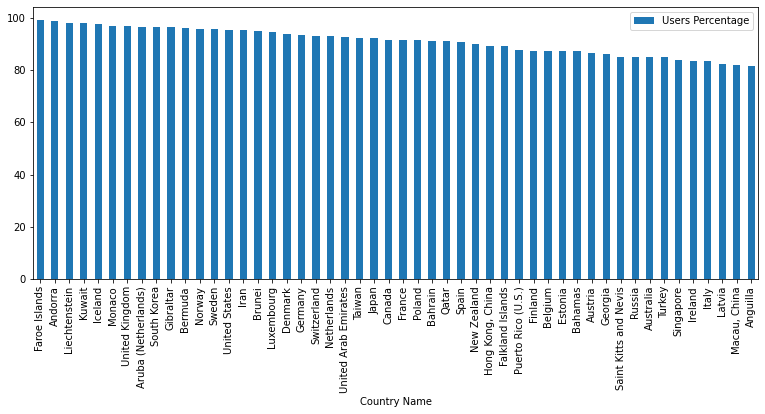

In [160]:
df_users = df_users.sort_values("Users Percentage", ascending=False)
df_users.head(50).plot.bar(x="Country Name", y="Users Percentage", figsize=(13, 5))

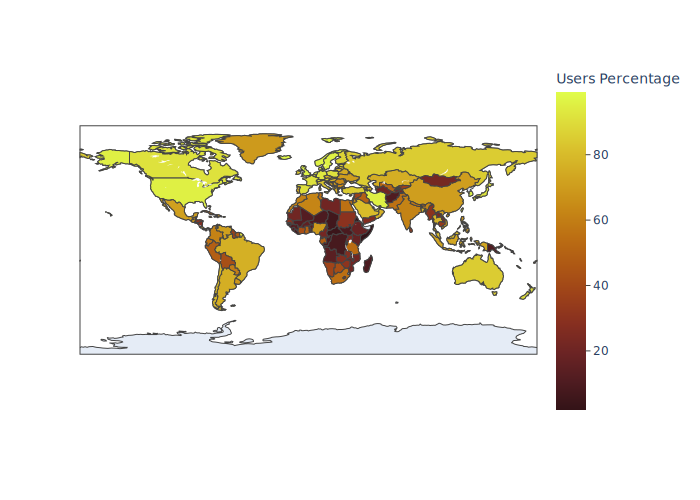

In [29]:
fig_users = px.choropleth(
    df_users, 
    locations='Country Name', 
    locationmode='country names', 
    scope='world', 
    color='Users Percentage',
    color_continuous_scale='solar'
)

fig_users.update_layout(coloraxis_colorbar=dict(
    title = 'Users Percentage',
    ticks = 'outside',
))

fig_users.show("svg")

Just by comparing the map just obtained with the previous two it can be seen that in less developed countries the percentage of people who use the internet is considerably lower, however with a scatter diagram it is possible to make much more accurate considerations.

The idea is to merge the 3 dataframes we have built, and build two scatter subplots, one for the GDP and one for the HDI.

We start joining `df_users` and `df_gdp2020` dataframes. Using the inner join method that uses the intersection of the keys of both frames, which allows us not to have rows with null values.

In [39]:
df_users_merged_gdp = pd.merge(
    left=df_users, 
    right=df_gdp2020, 
    on="Country Name", 
    how="inner",
)

df_users_merged_gdp = df_users_merged_gdp.sort_values("GDP").reset_index(drop=True)
df_users_merged_gdp

,Country Name,Internet users,Population,Users Percentage,Country Code,GDP
0,Burundi,607311,11175374.0,5.434368,BDI,233.837510
1,Somalia,294851,15008226.0,1.964596,SOM,438.255166
2,Mozambique,6162217,29496004.0,20.891701,MOZ,448.843891
3,Madagascar,2505948,26262313.0,9.541993,MDG,477.613041
4,Central African Republic,202204,4666368.0,4.333220,CAF,481.746297
...,...,...,...,...,...,...
166,Ireland,4024552,4818690.0,83.519629,IRL,85422.542868
167,Switzerland,7942864,8525611.0,93.164748,CHE,87100.414821
168,Bermuda,60349,62756.0,96.164510,BMU,107706.039785
169,Luxembourg,570794,604245.0,94.464001,LUX,116356.158037


In [40]:
df_users_merged_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      171 non-null    object 
 1   Internet users    171 non-null    int64  
 2   Population        171 non-null    float64
 3   Users Percentage  171 non-null    float64
 4   Country Code      171 non-null    object 
 5   GDP               171 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.1+ KB


Now let's merge the dataframe just obtained and `df_hdi2019`, again with the inner method.

In [46]:
df_users_merged_hdi = pd.merge(
    left=df_users,
    right=df_hdi2019,
    on="Country Name",
    how="inner"
)

df_users_merged_hdi = df_users_merged_hdi.sort_values("HDI").reset_index(drop=True)
df_users_merged_hdi

,Country Name,Internet users,Population,Users Percentage,HDI
0,Niger,2194985,22442831.0,9.780339,0.394
1,Central African Republic,202204,4666368.0,4.333220,0.397
2,Chad,968500,15477729.0,6.257378,0.398
3,Burundi,607311,11175374.0,5.434368,0.433
4,South Sudan,1003542,10975927.0,9.143118,0.433
...,...,...,...,...,...
164,Germany,77794405,83124418.0,93.587909,0.947
165,Iceland,329196,336713.0,97.767535,0.949
166,Switzerland,7942864,8525611.0,93.164748,0.955
167,Ireland,4024552,4818690.0,83.519629,0.955


In [44]:
df_users_merged_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      169 non-null    object 
 1   Internet users    169 non-null    int64  
 2   Population        169 non-null    float64
 3   Users Percentage  169 non-null    float64
 4   HDI               169 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.7+ KB


Now that we've merged the dataframes and made sure they don't have data inconsistencies, we can proceed to build the scatter plots.

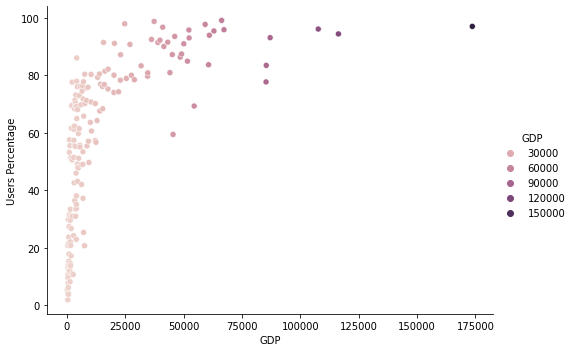

In [152]:
sns.relplot(
    data=df_users_merged_gdp, 
    x="GDP",
    y="Users Percentage", 
    kind="scatter",
    hue="GDP",
    height=5,
    aspect=11.7/8.27
)

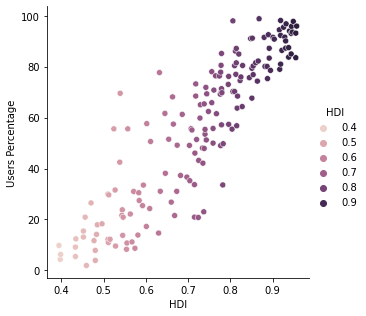

In [159]:
sns.relplot(
    data=df_users_merged_hdi, 
    x="HDI",
    y="Users Percentage", 
    kind="scatter",
    hue="HDI",
    height=4.5
)

Now it is very clear that economic development and especially social development greatly influence the percentage of internet users, we can visualize it even better using a regplot.

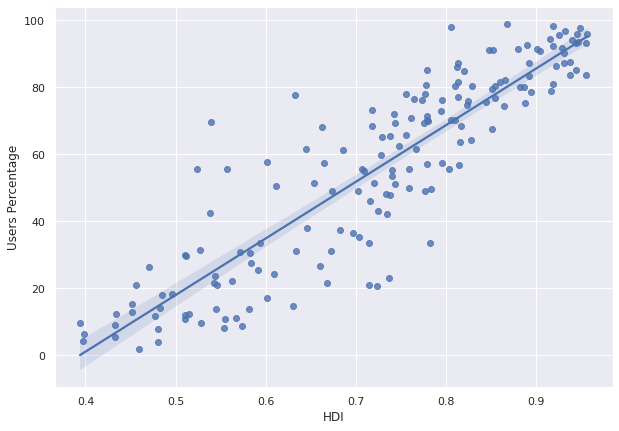

In [150]:
sns.set(rc={'figure.figsize':(10, 7)})

sns.regplot(
    data=df_users_merged_hdi, 
    x="HDI",
    y="Users Percentage"
)

sns.reset_orig()

Now we can see, even with the help of the regression line, how linear the trend in the percentage of users is: with the growth of development (in the social one it is even more evident given the homogeneity of distribution) the percentage of internet users increases equally.

The reasons for this correlation can be various, and will be the subject of study for the next questions.

## Queston 2: Is there a relationship between the average price of navigation and the speed of it?

## Question 3: How does the high competition and variety of plans affect the price and number of users?

## Question 4: Is a country's low social and economic development the cause of slower internet speeds?

## Question 5: Which are the countries with the best ratio between Internet cost and speed? What level of development do they have? Does this convenience involve more users?